In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
import os
base_dir = '/content/drive/MyDrive/PS5/Armenian_Coins/data'

print(os.listdir(base_dir))

['50dram', '200dram', '100dram', '10dram', '20dram', '500dram']


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 480 images belonging to 6 classes.
Found 120 images belonging to 6 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 167s 8s/step - accuracy: 0.1777 - loss: 3.0709 - val_accuracy: 0.4750 - val_loss: 1.5643
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 105s 4s/step - accuracy: 0.4709 - loss: 1.3620 - val_accuracy: 0.6583 - val_loss: 0.7317
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.8140 - loss: 0.6075 - val_accuracy: 0.8417 - val_loss: 0.3685
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.9306 - loss: 0.2343 - val_accuracy: 0.9917 - val_loss: 0.0681
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 68s 4s/step - accuracy: 0.9910 - loss: 0.0602 - val_accuracy: 0.9583 - val_loss: 0.0927


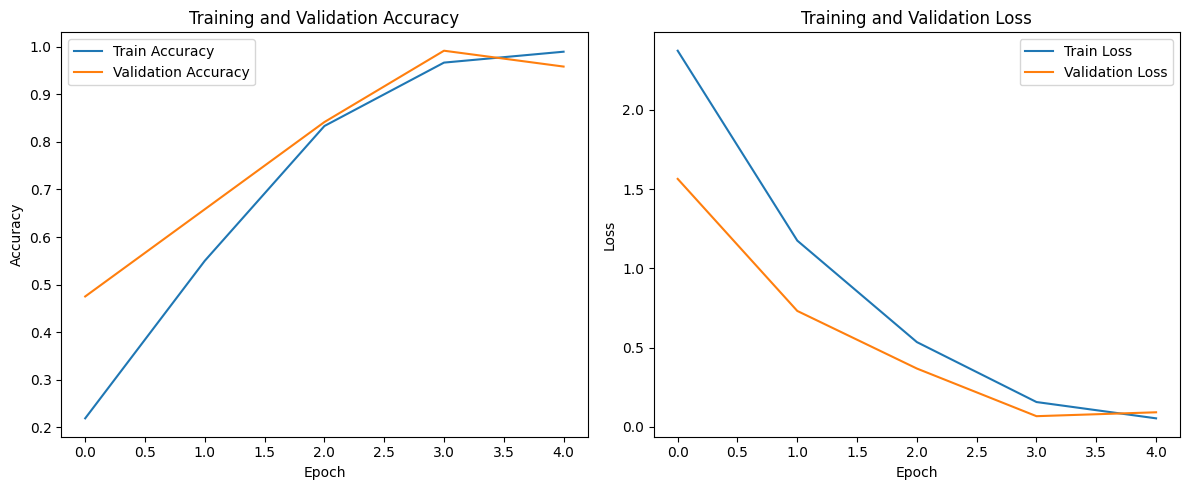

In [ ]:
#Plot training & validation accuracy
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

#Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


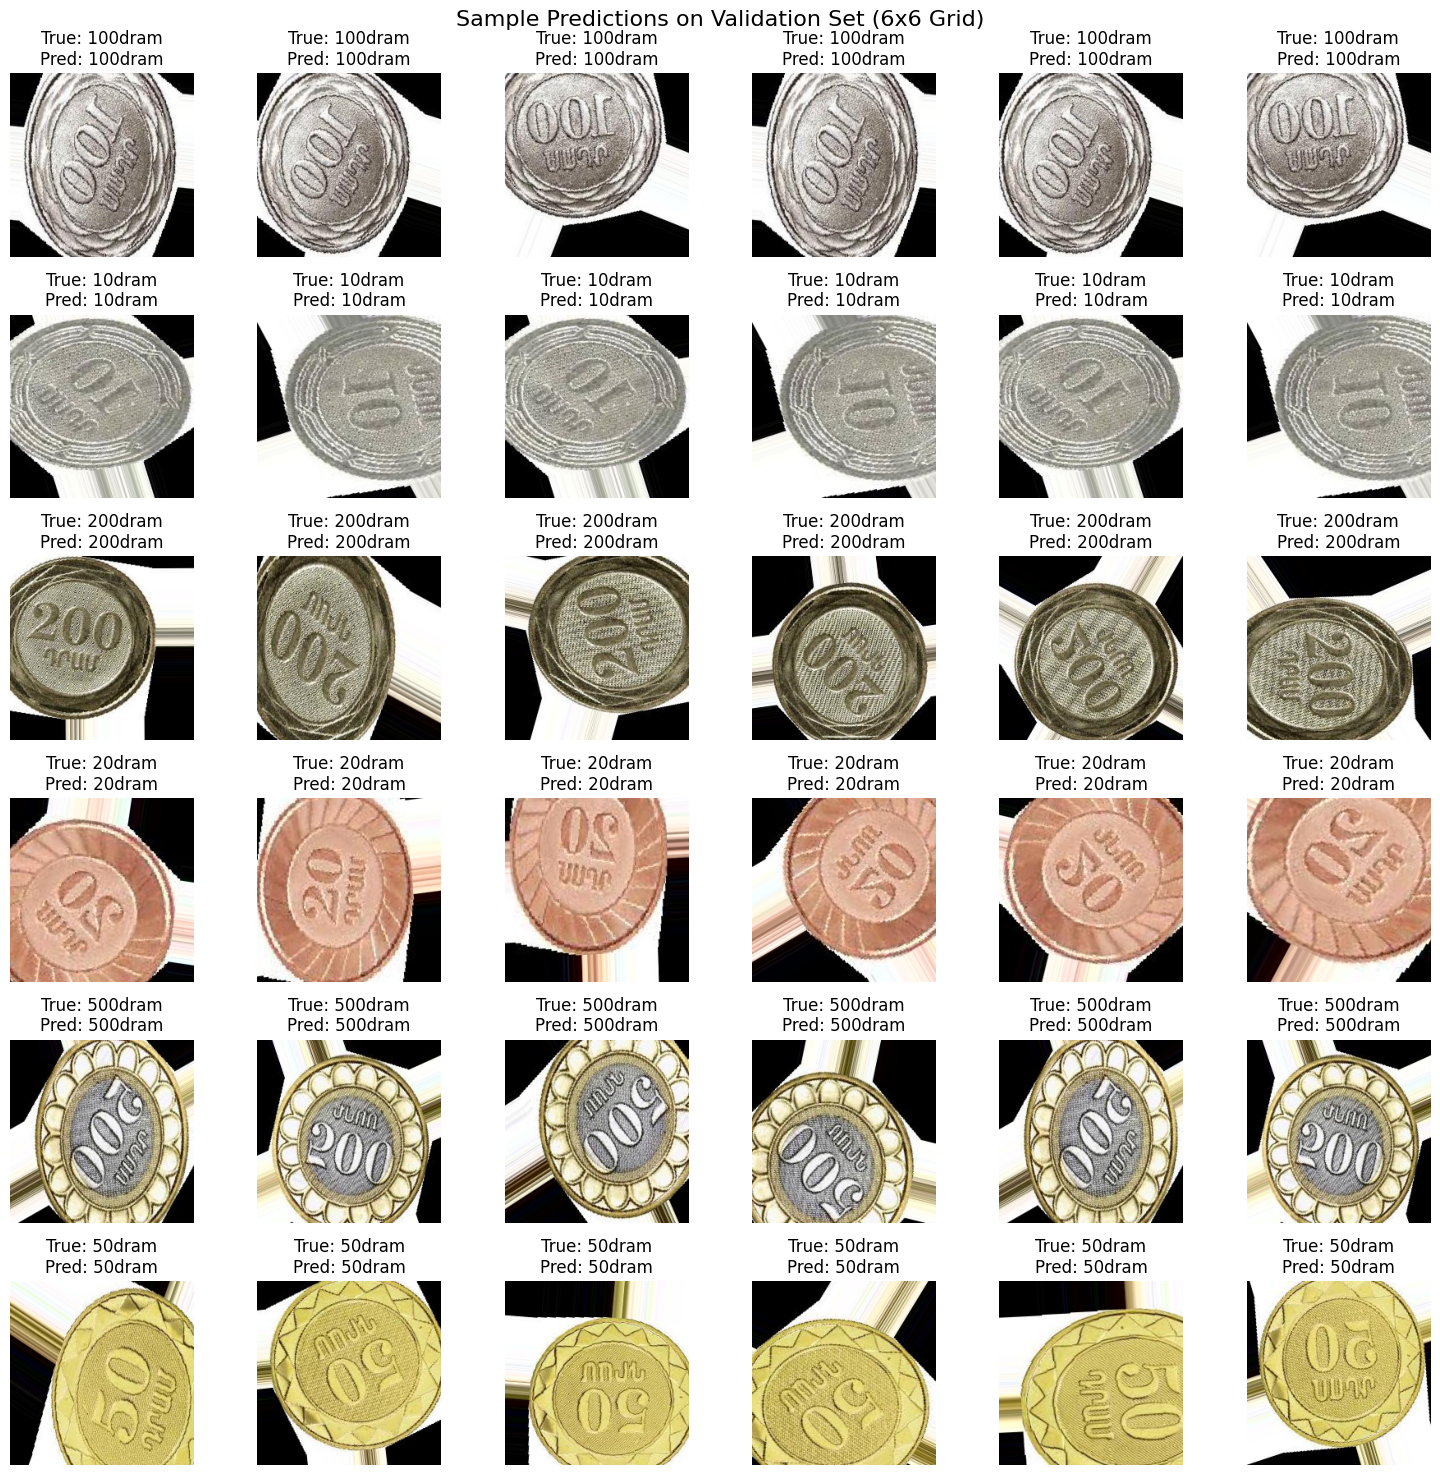

In [ ]:
class_labels = list(train_generator.class_indices.keys())
num_classes = len(class_labels)

val_images, val_labels = next(validation_generator)
predictions = model.predict(val_images)

plt.figure(figsize=(15, 15))
for class_index in range(num_classes):
    class_indices = [i for i, label in enumerate(np.argmax(val_labels, axis=1)) if label == class_index]

    if len(class_indices) < 6:
        class_indices = (class_indices * (6 // len(class_indices) + 1))[:6]
    else:
        class_indices = random.sample(class_indices, 6)

    for i, idx in enumerate(class_indices):
        plt.subplot(num_classes, 6, class_index * 6 + i + 1)
        img = val_images[idx]
        true_label = np.argmax(val_labels[idx])
        predicted_label = np.argmax(predictions[idx])

        plt.imshow(img)
        plt.axis('off')
        plt.title(f"True: {class_labels[true_label]}\nPred: {class_labels[predicted_label]}")

plt.suptitle('Sample Predictions on Validation Set (6x6 Grid)', size=16)
plt.tight_layout()
plt.show()

In [ ]:
pip install fastai

In [ ]:
from fastai.vision.all import *

In [ ]:
path = Path('/content/drive/My Drive/PS5/Armenian_Coins/data')

dls = ImageDataLoaders.from_folder(
    path,
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(mult=2)
)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 36.8MB/s]


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(slide=0.0003311311302240938, valley=0.0014454397605732083)

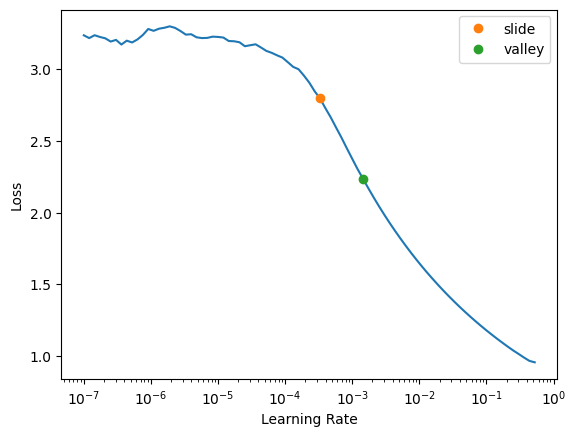

In [ ]:
learn.lr_find(suggest_funcs=(slide, valley))

In [ ]:
learn.fine_tune(3, base_lr=1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.012143,0.000211,0.000000,01:53


epoch,train_loss,valid_loss,error_rate,time
0,0.002526,0.000260,0.000000,02:32
1,0.002461,0.000154,0.000000,02:34
2,0.003590,0.000114,0.000000,02:34


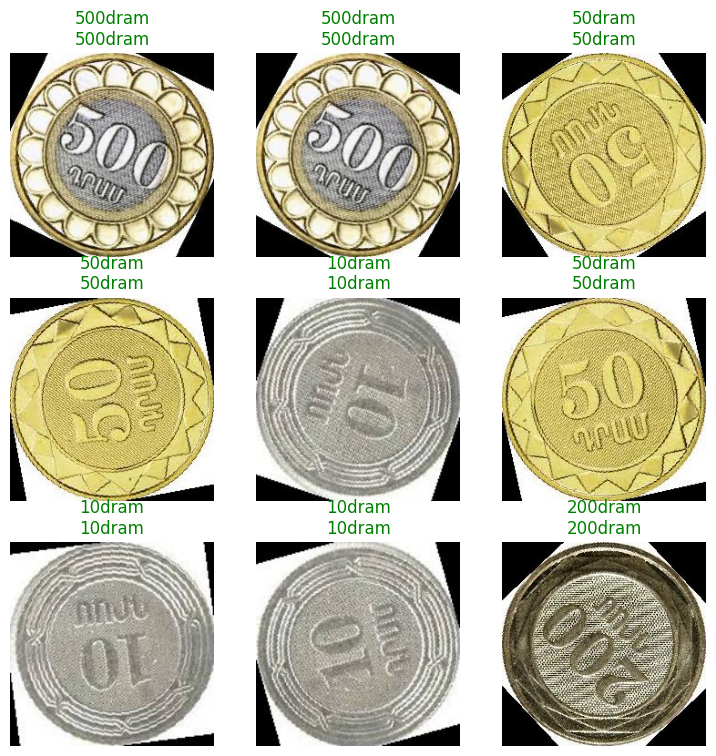

In [ ]:
learn.show_results()

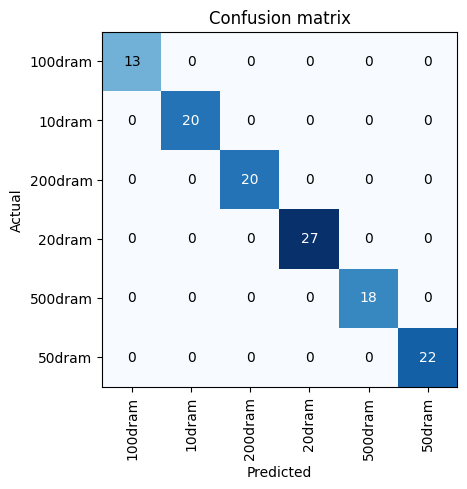

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
model.save('/content/drive/MyDrive/PS5/ACPModel.keras')

In [ ]:
learn.export('/content/drive/MyDrive/PS5/ACPModel.pkl')